In [143]:
from sklearn.preprocessing import PolynomialFeatures
# from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
# import smogn
from scipy.optimize import minimize
import csv
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.cluster import Birch
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn import svm
import numpy as np
import seaborn as sns
from scipy.stats import norm
import random
import math
import matplotlib.collections
from itertools import combinations
import networkx as nx

np.set_printoptions(threshold=np.inf)
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

np.set_printoptions(threshold=np.inf)


In [90]:

# # White Wines
# white_raw_data = pd.read_csv("clean_white.csv")
# white_raw_data.head()
#
# white_raw_data.isna().sum()
#
# X = white_raw_data.drop(["quality"], axis=1)
# Y = white_raw_data["quality"]
#
# Y.plot.hist()
# plt.show()
#
# # Resample the minority class. You can change the strategy to 'auto' if you are not sure.
# sm = SMOTE(sampling_strategy='auto', random_state=2, k_neighbors=2)
#
# # Fit the model to generate the data.
# oversampled_white_X, oversampled_white_Y = sm.fit_sample(X, Y)
# oversampled_white_data = pd.concat([pd.DataFrame(oversampled_white_X), pd.DataFrame(oversampled_white_Y)], axis=1)
#
# oversampled_white_data.to_csv('oversampled_clean_data_white.csv', index=False)
#
# oversampled_white_data['quality'].plot.hist()
# plt.show()
#
# mean = oversampled_white_X.mean()
# std = oversampled_white_X.std()
# normalized_white_X = (oversampled_white_X - mean) / std
# normalized_white_X.head()
#
# X_train, X_test, Y_train, Y_test = train_test_split(normalized_white_X, oversampled_white_Y, test_size=0.18,
#                                                     random_state=42)
#
# train_normalized_white_data = X_train.copy()
# train_normalized_white_data['quality'] = Y_train
#
# test_normalized_white_data = X_test.copy()
# test_normalized_white_data['quality'] = Y_test
# normalized_white_data = pd.concat([train_normalized_white_data, test_normalized_white_data])
# normalized_white_data.to_csv('normalized_clean_data_white.csv', index=False)
#
# sns.set(rc={'figure.figsize': (10, 8)})
# corr = oversampled_white_data.corr()
# sns.heatmap(corr,
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values,
#             cmap="YlGnBu",
#             annot=True,
#             fmt=".2f")
# plt.show()
#
# # Red wines
#
# red_data = pd.read_csv("clean_red.csv")
# red_data.head()
#
# X = red_data.drop(["quality"], axis=1)
# Y = red_data["quality"]
#
# Y.plot.hist()
# plt.show()
#
# # Resample the minority class. You can change the strategy to 'auto' if you are not sure.
# sm = SMOTE(sampling_strategy='auto', random_state=2, k_neighbors=2)
#
# # Fit the model to generate the data.
# oversampled_red_X, oversampled_red_Y = sm.fit_sample(X, Y)
# oversampled_red_data = pd.concat([pd.DataFrame(oversampled_red_X), pd.DataFrame(oversampled_red_Y)], axis=1)
#
# oversampled_red_data.to_csv('oversampled_clean_data_red.csv', index=False)
#
# oversampled_red_data['quality'].plot.hist()
# plt.show()
#
# mean = oversampled_red_X.mean()
# std = oversampled_red_X.std()
# normalized_red_X = (oversampled_red_X - mean) / std
# normalized_red_X.head()
#
# X_train, X_test, Y_train, Y_test = train_test_split(normalized_red_X, oversampled_red_Y, test_size=0.18,
#                                                     random_state=42)
#
# train_normalized_red_data = X_train.copy()
# train_normalized_red_data['quality'] = Y_train
#
# test_normalized_red_data = X_test.copy()
# test_normalized_red_data['quality'] = Y_test
# normalized_red_data = pd.concat([train_normalized_red_data, test_normalized_red_data])
# normalized_red_data.to_csv('normalized_clean_data_red.csv', index=False)
#
# sns.set(rc={'figure.figsize': (10, 8)})
# corr = oversampled_red_data.corr()
# sns.heatmap(corr,
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values,
#             cmap="YlGnBu",
#             annot=True,
#             fmt=".2f")
# plt.show()


## File names:

In [131]:
# FN = File Name


normalized_clean_data_FN = 'normalized_clean_data_red.csv'
oversampled_clean_data_FN = 'oversampled_clean_data_red.csv'
clean_data_FN = 'clean_red.csv'

# normalized_clean_data_FN = 'normalized_clean_data_white.csv'
# oversampled_clean_data_FN = 'oversampled_clean_data_white.csv'
# clean_data_FN = 'clean_white.csv'

In [185]:
# %matplotlib inline
%matplotlib qt5

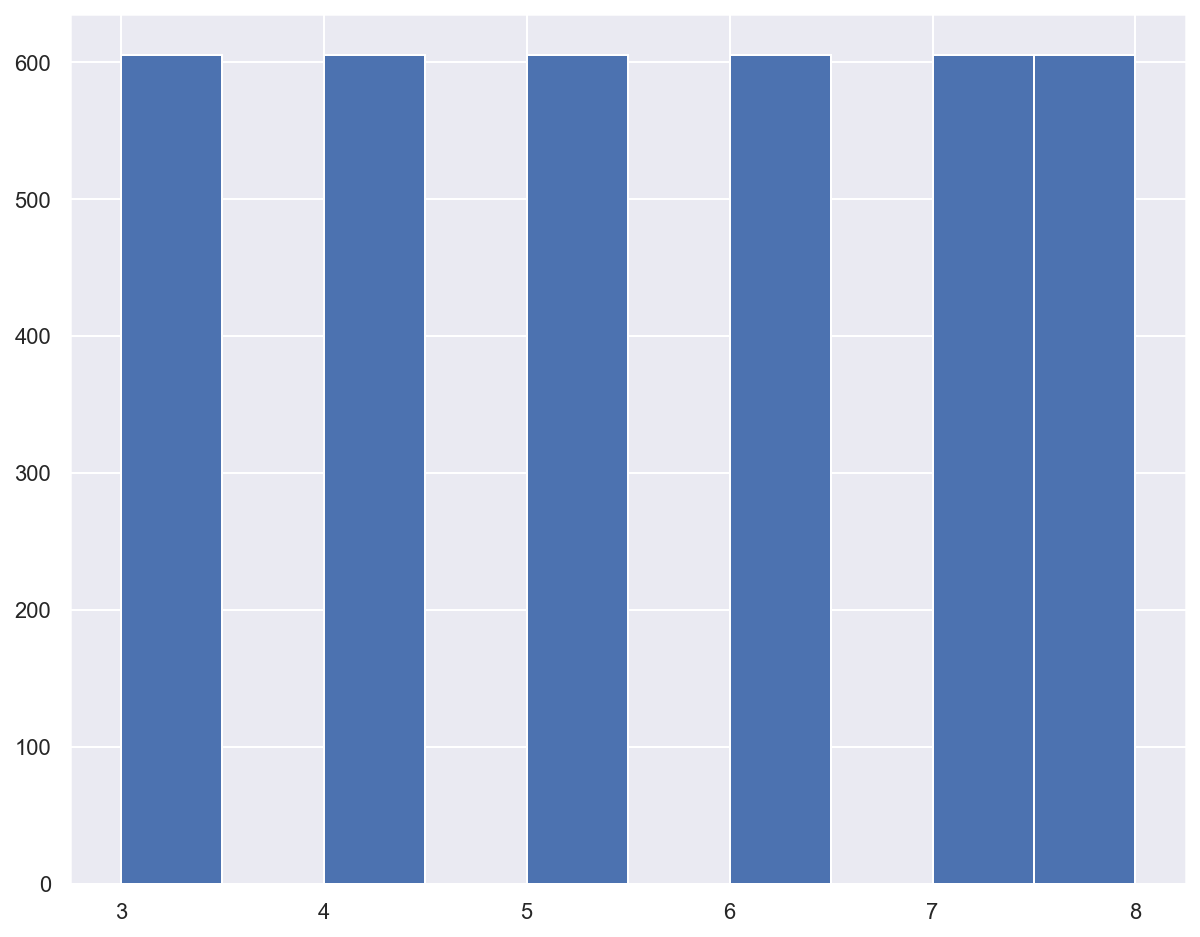

In [132]:
data = pd.read_csv(normalized_clean_data_FN)
X = data.drop(['quality'], axis=1)
Y = data['quality']
data.head()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

Y.hist()

# Question 1.a - Regrestion
##### we'll try out three regresion models and compair them.
##### 1. linear and polynomial regrestion
##### 2. SVM Regresor
##### 3. neural network regresor

## Linear Regrestion

In [133]:
reg = LinearRegression().fit(X_train, Y_train)
print('linear regression r2 score = ', reg.score(X_test, Y_test))

a = reg.predict(X_train)
train_mse = (mean_squared_error(a, Y_train))
print('linear regression train_mse =', train_mse)
b = reg.predict(X_test)
test_mse = (mean_squared_error(b, Y_test))
print('linear regression test_mse =', test_mse)

linear regression r2 score =  0.7529734249540304
linear regression train_mse = 0.764232596490558
linear regression test_mse = 0.6844100639852791


## Polynomial Regression

In [134]:
p_reg = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])

p_reg = p_reg.fit(X_train, Y_train)
p_reg.named_steps['linear'].coef_

from sklearn.metrics import mean_squared_error

print('polynomial regression r2 score = ', p_reg.score(X_test, Y_test))
a = p_reg.predict(X_train)
train_mse = (mean_squared_error(a, Y_train))
print('polynomial regression train_mse =', train_mse)
b = p_reg.predict(X_test)
test_mse = (mean_squared_error(b, Y_test))
print('polynomial regression test_mse =', test_mse)

polynomial regression r2 score =  0.8307322645137724
polynomial regression train_mse = 0.4582528339672339
polynomial regression test_mse = 0.4689719786351486


## SVM Regresors
#### 1. rbf kernel
#### 2. linear kernel
#### 3. polynomial kernel

In [158]:
SVR_rbf = svm.SVR(kernel='rbf')
SVR_lin = svm.SVR(kernel='linear')
SVR_poly = svm.SVR(kernel='poly', degree=2)
SVR_rbf.fit(X_train, Y_train)
SVR_lin.fit(X_train, Y_train)
SVR_poly.fit(X_train, Y_train)

print('SVR_rbf score = ', SVR_rbf.score(X_train, Y_train))
a = SVR_rbf.predict(X_train)
train_mse = (mean_squared_error(a, Y_train))
print('SVR_rbf train_mse = ', train_mse)
b = SVR_rbf.predict(X_test)
test_mse = (mean_squared_error(b, Y_test))
print('SVR_rbf test_mse = ', test_mse, '\n')

print('SVR_lin score = ', SVR_lin.score(X_train, Y_train))
a = SVR_lin.predict(X_train)
train_mse = (mean_squared_error(a, Y_train))
print('SVR_lin train_mse = ', train_mse)
b = SVR_lin.predict(X_test)
test_mse = (mean_squared_error(b, Y_test))
print('SVR_lin test_mse = ', test_mse, '\n')

print('SVR_poly score = ', SVR_poly.score(X_train, Y_train))
a = SVR_poly.predict(X_train)
train_mse = (mean_squared_error(a, Y_train))
print('SVR_poly train_mse = ', train_mse)
b = SVR_poly.predict(X_test)
test_mse = (mean_squared_error(b, Y_test))
print('SVR_poly test_mse = ', test_mse)


SVR_rbf score =  0.9238978851028715
SVR_rbf train_mse =  0.2247420089335835
SVR_rbf test_mse =  0.2349053505201907 

SVR_lin score =  0.732014569657285
SVR_lin train_mse =  0.7914048651810229
SVR_lin test_mse =  0.6914038046475741 

SVR_poly score =  0.4970064682561394
SVR_poly train_mse =  1.4854222771275287
SVR_poly test_mse =  1.627055296323055


# Deep Neural Network Regresor

In [162]:
import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.layers import Dropout
from keras.models import Model
import tensorflow as tf

In [171]:
DNN_model_selu = Sequential()
DNN_model_selu.add(Dense(100, input_dim=11, activation= "selu"))
DNN_model_selu.add(Dropout(0.1))
DNN_model_selu.add(Dense(128, activation= "selu"))
DNN_model_selu.add(Dropout(0.1))
DNN_model_selu.add(Dense(128, activation= "selu"))
DNN_model_selu.add(Dropout(0.1))
DNN_model_selu.add(Dense(2, activation= "selu"))
DNN_model_selu.add(Dense(1))

In [172]:
DNN_model_relu = Sequential()
DNN_model_relu.add(Dense(100, input_dim=11, activation= "relu"))
DNN_model_relu.add(Dropout(0.1))
DNN_model_relu.add(Dense(128, activation= "relu"))
DNN_model_relu.add(Dropout(0.1))
DNN_model_relu.add(Dense(128, activation= "relu"))
DNN_model_relu.add(Dropout(0.1))
DNN_model_relu.add(Dense(2, activation= "relu"))
DNN_model_relu.add(Dense(1))

In [173]:
DNN_model_soft_max = Sequential()
DNN_model_soft_max.add(Dense(100, input_dim=11, activation= "softmax"))
DNN_model_soft_max.add(Dropout(0.1))
DNN_model_soft_max.add(Dense(128, activation= "softmax"))
DNN_model_soft_max.add(Dropout(0.1))
DNN_model_soft_max.add(Dense(128, activation= "softmax"))
DNN_model_soft_max.add(Dropout(0.1))
DNN_model_soft_max.add(Dense(2, activation= "softmax"))
DNN_model_soft_max.add(Dense(1))

In [174]:
DNN_model_selu.compile(loss= "mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])
#history = NN_model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])
selu_history = DNN_model_selu.fit(X_train, Y_train, epochs=100, validation_split=0.3)

Train on 2032 samples, validate on 872 samples
Epoch 1/100
2032/2032 [==============================] - 1s 336us/step - loss: 8.0580 - mean_squared_error: 8.0580 - val_loss: 0.8010 - val_mean_squared_error: 0.8010
Epoch 2/100
2032/2032 [==============================] - 0s 126us/step - loss: 1.2170 - mean_squared_error: 1.2170 - val_loss: 0.6308 - val_mean_squared_error: 0.6308
Epoch 3/100
2032/2032 [==============================] - 0s 117us/step - loss: 1.0500 - mean_squared_error: 1.0500 - val_loss: 0.5786 - val_mean_squared_error: 0.5786
Epoch 4/100
2032/2032 [==============================] - 0s 118us/step - loss: 0.9578 - mean_squared_error: 0.9578 - val_loss: 0.5614 - val_mean_squared_error: 0.5614
Epoch 5/100
2032/2032 [==============================] - 0s 114us/step - loss: 0.8690 - mean_squared_error: 0.8690 - val_loss: 0.4859 - val_mean_squared_error: 0.4859
Epoch 6/100
2032/2032 [==============================] - 0s 111us/step - loss: 0.8203 - mean_squared_error: 0.8203 - v

2032/2032 [==============================] - 0s 146us/step - loss: 0.4192 - mean_squared_error: 0.4192 - val_loss: 0.3164 - val_mean_squared_error: 0.3164
Epoch 50/100
2032/2032 [==============================] - 0s 141us/step - loss: 0.4181 - mean_squared_error: 0.4181 - val_loss: 0.3143 - val_mean_squared_error: 0.3143
Epoch 51/100
2032/2032 [==============================] - 0s 143us/step - loss: 0.4186 - mean_squared_error: 0.4186 - val_loss: 0.3067 - val_mean_squared_error: 0.3067
Epoch 52/100
2032/2032 [==============================] - 0s 141us/step - loss: 0.4044 - mean_squared_error: 0.4044 - val_loss: 0.3017 - val_mean_squared_error: 0.3017
Epoch 53/100
2032/2032 [==============================] - 0s 144us/step - loss: 0.4208 - mean_squared_error: 0.4208 - val_loss: 0.3315 - val_mean_squared_error: 0.3315
Epoch 54/100
2032/2032 [==============================] - 0s 145us/step - loss: 0.4167 - mean_squared_error: 0.4167 - val_loss: 0.3056 - val_mean_squared_error: 0.3056
Epoch

Epoch 98/100
2032/2032 [==============================] - 0s 151us/step - loss: 0.3121 - mean_squared_error: 0.3121 - val_loss: 0.2527 - val_mean_squared_error: 0.2527
Epoch 99/100
2032/2032 [==============================] - 0s 160us/step - loss: 0.3153 - mean_squared_error: 0.3153 - val_loss: 0.2795 - val_mean_squared_error: 0.2795
Epoch 100/100
2032/2032 [==============================] - 0s 147us/step - loss: 0.3252 - mean_squared_error: 0.3252 - val_loss: 0.2603 - val_mean_squared_error: 0.2603


In [175]:
DNN_model_relu.compile(loss= "mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])
#history = NN_model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])
relu_history = DNN_model_relu.fit(X_train, Y_train, epochs=100, validation_split=0.3)

Train on 2032 samples, validate on 872 samples
Epoch 1/100
2032/2032 [==============================] - 1s 347us/step - loss: 21.9193 - mean_squared_error: 21.9193 - val_loss: 2.7370 - val_mean_squared_error: 2.7370
Epoch 2/100
2032/2032 [==============================] - 0s 115us/step - loss: 2.4269 - mean_squared_error: 2.4269 - val_loss: 1.4525 - val_mean_squared_error: 1.4525
Epoch 3/100
2032/2032 [==============================] - 0s 118us/step - loss: 1.8164 - mean_squared_error: 1.8164 - val_loss: 1.2188 - val_mean_squared_error: 1.2188
Epoch 4/100
2032/2032 [==============================] - 0s 130us/step - loss: 1.5528 - mean_squared_error: 1.5528 - val_loss: 1.0594 - val_mean_squared_error: 1.0594
Epoch 5/100
2032/2032 [==============================] - 0s 126us/step - loss: 1.3729 - mean_squared_error: 1.3729 - val_loss: 0.9361 - val_mean_squared_error: 0.9361
Epoch 6/100
2032/2032 [==============================] - 0s 128us/step - loss: 1.2700 - mean_squared_error: 1.2700 -

2032/2032 [==============================] - 0s 163us/step - loss: 0.3739 - mean_squared_error: 0.3739 - val_loss: 0.3040 - val_mean_squared_error: 0.3040
Epoch 50/100
2032/2032 [==============================] - 0s 149us/step - loss: 0.3691 - mean_squared_error: 0.3691 - val_loss: 0.2343 - val_mean_squared_error: 0.2343
Epoch 51/100
2032/2032 [==============================] - 0s 146us/step - loss: 0.3341 - mean_squared_error: 0.3341 - val_loss: 0.2319 - val_mean_squared_error: 0.2319
Epoch 52/100
2032/2032 [==============================] - 0s 150us/step - loss: 0.3574 - mean_squared_error: 0.3574 - val_loss: 0.2577 - val_mean_squared_error: 0.2577
Epoch 53/100
2032/2032 [==============================] - 0s 153us/step - loss: 0.3551 - mean_squared_error: 0.3551 - val_loss: 0.2391 - val_mean_squared_error: 0.2391
Epoch 54/100
2032/2032 [==============================] - 0s 172us/step - loss: 0.3497 - mean_squared_error: 0.3497 - val_loss: 0.2714 - val_mean_squared_error: 0.2714
Epoch

Epoch 98/100
2032/2032 [==============================] - 0s 130us/step - loss: 0.2547 - mean_squared_error: 0.2547 - val_loss: 0.1964 - val_mean_squared_error: 0.1964
Epoch 99/100
2032/2032 [==============================] - 0s 128us/step - loss: 0.2616 - mean_squared_error: 0.2616 - val_loss: 0.1957 - val_mean_squared_error: 0.1957
Epoch 100/100
2032/2032 [==============================] - 0s 134us/step - loss: 0.2437 - mean_squared_error: 0.2437 - val_loss: 0.2121 - val_mean_squared_error: 0.2121


In [176]:
DNN_model_soft_max.compile(loss= "mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])
#history = NN_model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])
soft_max_history = DNN_model_soft_max.fit(X_train, Y_train, epochs=100, validation_split=0.3)

Train on 2032 samples, validate on 872 samples
Epoch 1/100
2032/2032 [==============================] - 1s 466us/step - loss: 36.8109 - mean_squared_error: 36.8110 - val_loss: 35.7333 - val_mean_squared_error: 35.7333
Epoch 2/100
2032/2032 [==============================] - 0s 138us/step - loss: 35.1501 - mean_squared_error: 35.1501 - val_loss: 34.1096 - val_mean_squared_error: 34.1096
Epoch 3/100
2032/2032 [==============================] - 0s 142us/step - loss: 33.5460 - mean_squared_error: 33.5460 - val_loss: 32.5425 - val_mean_squared_error: 32.5425
Epoch 4/100
2032/2032 [==============================] - 0s 154us/step - loss: 31.9966 - mean_squared_error: 31.9966 - val_loss: 31.0249 - val_mean_squared_error: 31.0249
Epoch 5/100
2032/2032 [==============================] - 0s 149us/step - loss: 30.4997 - mean_squared_error: 30.4997 - val_loss: 29.5687 - val_mean_squared_error: 29.5687
Epoch 6/100
2032/2032 [==============================] - 0s 162us/step - loss: 29.0573 - mean_squa

Epoch 49/100
2032/2032 [==============================] - 0s 184us/step - loss: 3.9223 - mean_squared_error: 3.9223 - val_loss: 3.9437 - val_mean_squared_error: 3.9437
Epoch 50/100
2032/2032 [==============================] - 0s 203us/step - loss: 3.8116 - mean_squared_error: 3.8116 - val_loss: 3.8402 - val_mean_squared_error: 3.8402
Epoch 51/100
2032/2032 [==============================] - 0s 181us/step - loss: 3.7104 - mean_squared_error: 3.7104 - val_loss: 3.7475 - val_mean_squared_error: 3.7475
Epoch 52/100
2032/2032 [==============================] - 0s 169us/step - loss: 3.6177 - mean_squared_error: 3.6177 - val_loss: 3.6647 - val_mean_squared_error: 3.6647
Epoch 53/100
2032/2032 [==============================] - 0s 175us/step - loss: 3.5339 - mean_squared_error: 3.5339 - val_loss: 3.5867 - val_mean_squared_error: 3.5867
Epoch 54/100
2032/2032 [==============================] - 0s 175us/step - loss: 3.4571 - mean_squared_error: 3.4571 - val_loss: 3.5182 - val_mean_squared_error:

Epoch 98/100
2032/2032 [==============================] - 0s 158us/step - loss: 2.9109 - mean_squared_error: 2.9109 - val_loss: 3.0529 - val_mean_squared_error: 3.0529
Epoch 99/100
2032/2032 [==============================] - 0s 166us/step - loss: 2.9105 - mean_squared_error: 2.9105 - val_loss: 3.0531 - val_mean_squared_error: 3.0531
Epoch 100/100
2032/2032 [==============================] - 0s 148us/step - loss: 2.9106 - mean_squared_error: 2.9106 - val_loss: 3.0533 - val_mean_squared_error: 3.0533


In [186]:
# list all data in history
print(selu_history.history.keys())
print(relu_history.history.keys())
# summarize history for accuracy
plt.figure(figsize = (12,7))
plt.plot(selu_history.history['mean_squared_error'], label='selu')
# plt.plot(selu_history.history['val_mean_squared_error'], label='selu')
plt.plot(relu_history.history['mean_squared_error'], label='relu')
# plt.plot(relu_history.history['val_mean_squared_error'], label='relu')
plt.plot(soft_max_history.history['mean_squared_error'], label='soft max')
# plt.plot(soft_max_history.history['val_mean_squared_error'], label='soft max')
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend()
plt.show()
# # summarize history for loss
# plt.figure(figsize = (12,7))
# plt.plot(selu_history.history['loss'], label='selu')
# # plt.plot(selu_history.history['val_loss'], label='selu')
# plt.plot(relu_history.history['loss'], label='relu')
# # plt.plot(relu_history.history['val_loss'], label='relu')
# plt.plot(soft_max_history.history['loss'], label='soft max')
# # plt.plot(soft_max_history.history['val_loss'], label='soft max')
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend()
# plt.show()

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])
dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


In [170]:
a_selu = DNN_model_selu.predict(X_train)
train_rmse = (mean_squared_error(a_selu, Y_train)) ** 0.5
print('selu NN train_rmse = ',train_rmse)
b_selu =  DNN_model_selu.predict(X_test)
test_rmse = (mean_squared_error(b_selu, Y_test)) ** 0.5
print('selu NN test_rmse = ', test_rmse)

a_relu = DNN_model_relu.predict(X_train)
train_rmse = (mean_squared_error(a_relu, Y_train)) ** 0.5
print('relu NN train_rmse = ',train_rmse)
b_relu =  DNN_model_relu.predict(X_test)
test_rmse = (mean_squared_error(b_relu, Y_test)) ** 0.5
print('relu NN test_rmse = ', test_rmse)

a_soft_max = DNN_model_soft_max.predict(X_train)
train_rmse = (mean_squared_error(a_relu, Y_train)) ** 0.5
print('soft max NN train_rmse = ',train_rmse)
b_soft_max =  DNN_model_soft_max.predict(X_test)
test_rmse = (mean_squared_error(b_relu, Y_test)) ** 0.5
print('soft max NN test_rmse = ', test_rmse)

NameError: name 'y_train' is not defined

In [98]:

# # # # # # # # # # # # # # # # # # # # # # # Clustering:
def points_for_cluster_df(clustering_labels):
    hist_dictionary = {}
    for i in clustering_labels:
        if str(i) in hist_dictionary:
            hist_dictionary[str(i)] = hist_dictionary[str(i)] + 1
        else:
            hist_dictionary[str(i)] = 1
    clusters_names_numeric = [int(x) for x in hist_dictionary.keys()]
    clusters_names_numeric.sort()
    clusters_names = [str(name) for name in clusters_names_numeric]
    points_amount_for_cluster = [hist_dictionary[x] for x in clusters_names]
    clustering_hist_df = pd.DataFrame([points_amount_for_cluster])
    clustering_hist_df.columns = clusters_names
    return clustering_hist_df


def plot_silhouette_score(clustering_method, clusters, s_scores):
    plt.plot(clusters, s_scores, color='blue', label='Silhouette score')
    plt.title(clustering_method + ' clustering Silhouette score depending on clusters number')
    plt.ylabel('Silhouette score')
    plt.xlabel('clusters')
    # plt.axhline(0, lw=0.5, color='black')
    # plt.axvline(0, lw=0.5, color='black')
    plt.legend()
    plt.show()



# BIRCH

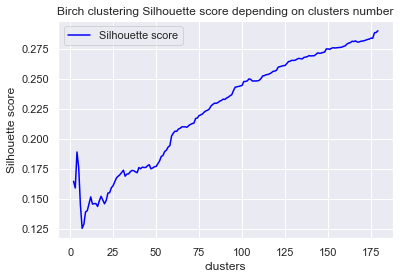

In [99]:
s_scores = []
clusters = range(2, 180)
for i in clusters:
    br = Birch(n_clusters=i).fit(X_train)
    s_scores.append(silhouette_score(X_train, br.labels_))

plot_silhouette_score('Birch', clusters, s_scores)

In [100]:
# Optimize Birch clustering with 105 clusters:
optimize_br = Birch(n_clusters=105).fit(X_train)
points_for_cluster_df(optimize_br.labels_)

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,63,35,20,35,29,33,21,29,52,6,...,6,1,8,4,7,10,6,10,15,27


# K-Means

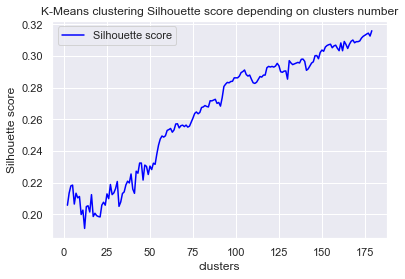

In [101]:
s_scores = []
clusters = range(2, 180)
for i in clusters:
    k_means = KMeans(n_clusters=i, random_state=0).fit(X_train)
    s_scores.append(silhouette_score(X_train, k_means.labels_))

plot_silhouette_score('K-Means', clusters, s_scores)

In [102]:
# Optimize K-Means clustering 105 clusters:

optimize_km = KMeans(n_clusters=105, random_state=0).fit(X_train)
points_for_cluster_df(optimize_km.labels_)

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,25,21,32,56,48,33,33,14,42,16,...,16,32,8,25,9,29,5,27,19,23


# MeanShift

In [103]:
# Optimize MeanShift clustering using estimate_bandwidth:

optimize_bandwidth = estimate_bandwidth(X_train)
optimize_ms = MeanShift(bandwidth=optimize_bandwidth).fit(X_train)
points_for_cluster_df(optimize_ms.labels_)

print(optimize_bandwidth)
print()


3.8471424931888505



### Predict qualities with the clusters mean quality

In [104]:
def mean_quality_for_cluster_dictionary(df, clustering):
    mean_qualities = {}
    for i in df[clustering].unique():
        mean_qualities[i] = df[df[clustering] == i]['quality'].mean()
    return mean_qualities


def cluster_mse_score(cluster_quality_dict: dict, test_cluster_lables: pd.Series, real_test_values: pd.Series):
    predicted_qualities = []
    for i in test_cluster_lables:
        predicted_qualities.append(cluster_quality_dict[i])
    predicted_qualities = pd.Series(predicted_qualities)
    return mean_squared_error(predicted_qualities, real_test_values)


train_with_clusters = X_train.copy()
train_with_clusters['quality'] = Y_train
# MeanShift:
train_with_clusters['ms_cluster'] = optimize_ms.labels_
ms_qualities_dict = mean_quality_for_cluster_dictionary(train_with_clusters, 'ms_cluster')
# Birch:
train_with_clusters['br_cluster'] = optimize_br.labels_
br_qualities_dict = mean_quality_for_cluster_dictionary(train_with_clusters, 'br_cluster')
# Kmeans
train_with_clusters['km_cluster'] = optimize_km.labels_
km_qualities_dict = mean_quality_for_cluster_dictionary(train_with_clusters, 'km_cluster')


print()
print('br_qualities_dict: ', br_qualities_dict)
print()
print('km_qualities_dict: ', km_qualities_dict)
print()
print('ms_qualities_dict: ', ms_qualities_dict)
print()

test = X_test.copy()
test['quality'] = Y_test

# Birch:
br_test_labels = optimize_br.predict(X_test)
print('Birch mse: ', cluster_mse_score(br_qualities_dict, br_test_labels, test['quality']))

# K-Means
km_test_labels = optimize_km.predict(X_test)
print('K-Means mse: ', cluster_mse_score(km_qualities_dict, km_test_labels, test['quality']))

# MeanShift:
ms_test_labels = optimize_ms.predict(X_test)
print('Mean Shift mse: ', cluster_mse_score(ms_qualities_dict, ms_test_labels, test['quality']))




br_qualities_dict:  {55: 5.333333333333333, 99: 6.428571428571429, 85: 4.319148936170213, 103: 4.466666666666667, 49: 7.78494623655914, 56: 4.583333333333333, 57: 6.571428571428571, 25: 4.529411764705882, 0: 5.063492063492063, 17: 7.431372549019608, 14: 7.159090909090909, 26: 6.782608695652174, 24: 6.466666666666667, 20: 5.44, 104: 7.777777777777778, 6: 6.904761904761905, 12: 4.608695652173913, 35: 5.153846153846154, 93: 7.694915254237288, 71: 5.666666666666667, 101: 5.166666666666667, 7: 6.068965517241379, 58: 5.454545454545454, 11: 6.076923076923077, 89: 7.857142857142857, 90: 3.0, 28: 4.733333333333333, 32: 6.461538461538462, 74: 6.625, 47: 7.586956521739131, 44: 3.0854271356783918, 43: 3.1451612903225805, 67: 6.611111111111111, 68: 5.3, 23: 6.785714285714286, 2: 5.15, 72: 7.622641509433962, 70: 6.5, 38: 4.4375, 53: 3.2903225806451615, 29: 5.15, 45: 6.235294117647059, 21: 4.944444444444445, 62: 5.428571428571429, 22: 5.928571428571429, 33: 3.5794392523364484, 48: 4.82051282051282, 

# Dimension Reduction

In [105]:
def printPrejections(reducted_df: pd.DataFrame, model_name: str):
    for i in range(0, 2):
        for j in range(i + 1, 3):
            plotName = model_name + ' (dim ' + str(i) + '),(dim ' + str(j) + ')'
            dim1 = '(dim ' + str(i) + ')'
            dim2 = '(dim ' + str(j) + ')'
            vis = pd.DataFrame()
            vis[dim1] = reducted_df[i]
            vis[dim2] = reducted_df[j]
            vis['Y'] = reducted_df['quality']
            plt.figure(figsize=(16, 10))
            sns.scatterplot(
                x=dim1, y=dim2,
                hue="Y",
                palette=sns.color_palette("hls", len(set(list(reducted_df['quality'])))),
                data=vis,
                legend="full",
                alpha=0.8
            ).set_title(plotName)
            plt.show()



## pca

[0.28993442 0.22235359 0.16048443]
[107.58202509  94.21323036  80.03985281]


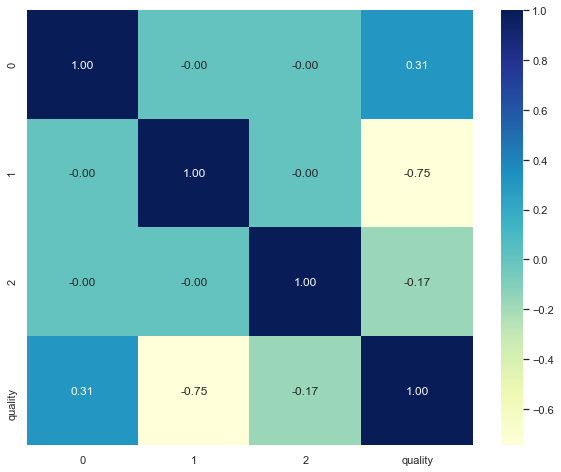

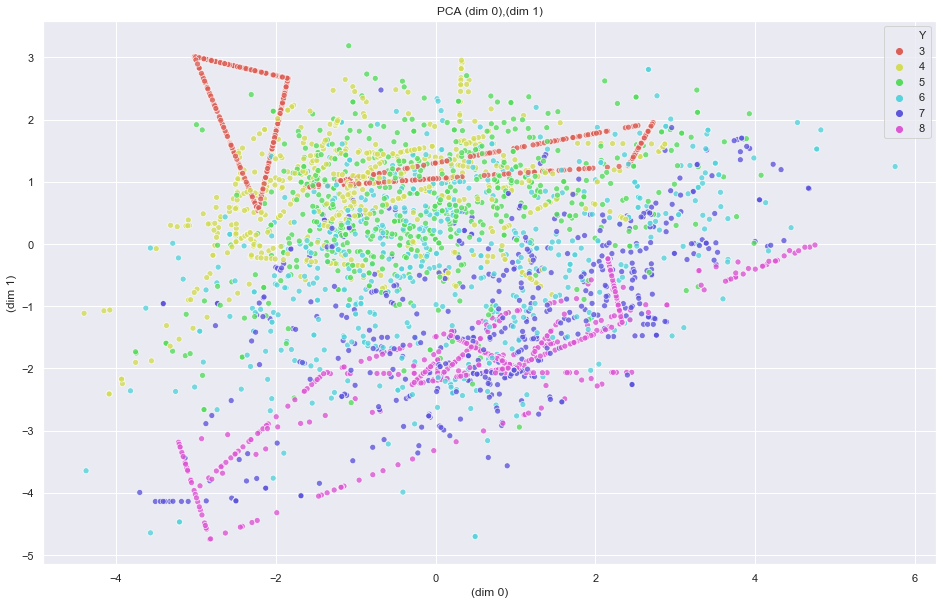

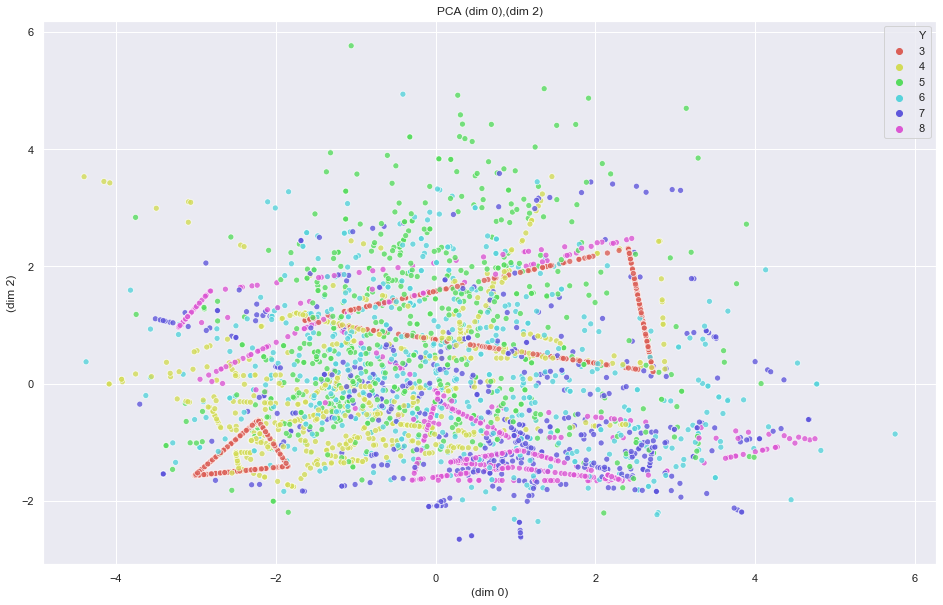

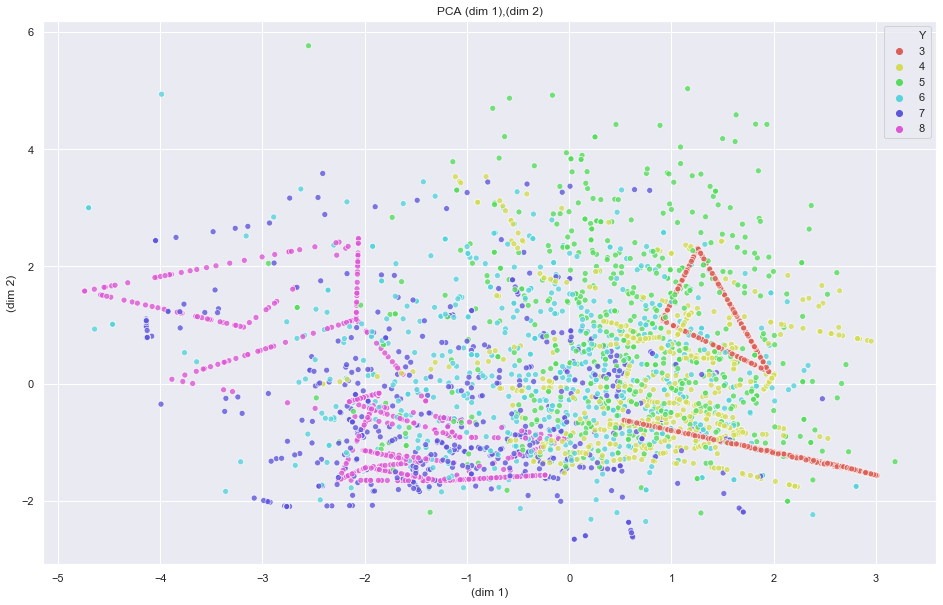

In [106]:
from sklearn.decomposition import PCA, IncrementalPCA

pca = IncrementalPCA(n_components=3)
pca.fit(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

pca_df = pd.DataFrame(pca.transform(X))
pca_df['quality'] = Y

import seaborn as sns

sns.set(rc={'figure.figsize': (10, 8)})
corr = pca_df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu",
            annot=True,
            fmt=".2f")
plt.show()

printPrejections(pca_df, 'PCA')


## Auto Encoder

Train on 2904 samples, validate on 726 samples
Epoch 1/100
2904/2904 [==============================] - 1s 218us/step - loss: 0.6280 - val_loss: 0.5475
Epoch 2/100
2904/2904 [==============================] - 0s 14us/step - loss: 0.4643 - val_loss: 0.3030
Epoch 3/100
2904/2904 [==============================] - 0s 14us/step - loss: 0.1699 - val_loss: -0.1014
Epoch 4/100
2904/2904 [==============================] - 0s 15us/step - loss: -0.3397 - val_loss: -0.9160
Epoch 5/100
2904/2904 [==============================] - 0s 18us/step - loss: -9.5570 - val_loss: -298.6622
Epoch 6/100
2904/2904 [==============================] - 0s 15us/step - loss: -419216897541967.5000 - val_loss: -138768931956347680.0000
Epoch 7/100
2904/2904 [==============================] - 0s 18us/step - loss: nan - val_loss: nan
Epoch 8/100
2904/2904 [==============================] - 0s 16us/step - loss: nan - val_loss: nan
Epoch 9/100
2904/2904 [==============================] - 0s 18us/step - loss: nan - val_loss

2904/2904 [==============================] - 0s 21us/step - loss: nan - val_loss: nan
Epoch 83/100
2904/2904 [==============================] - 0s 21us/step - loss: nan - val_loss: nan
Epoch 84/100
2904/2904 [==============================] - 0s 21us/step - loss: nan - val_loss: nan
Epoch 85/100
2904/2904 [==============================] - 0s 22us/step - loss: nan - val_loss: nan
Epoch 86/100
2904/2904 [==============================] - 0s 22us/step - loss: nan - val_loss: nan
Epoch 87/100
2904/2904 [==============================] - 0s 27us/step - loss: nan - val_loss: nan
Epoch 88/100
2904/2904 [==============================] - 0s 23us/step - loss: nan - val_loss: nan
Epoch 89/100
2904/2904 [==============================] - 0s 22us/step - loss: nan - val_loss: nan
Epoch 90/100
2904/2904 [==============================] - 0s 20us/step - loss: nan - val_loss: nan
Epoch 91/100
2904/2904 [==============================] - 0s 21us/step - loss: nan - val_loss: nan
Epoch 92/100
2904/2904 

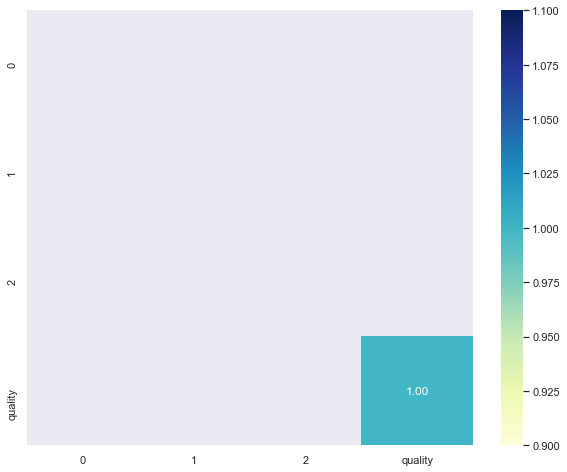

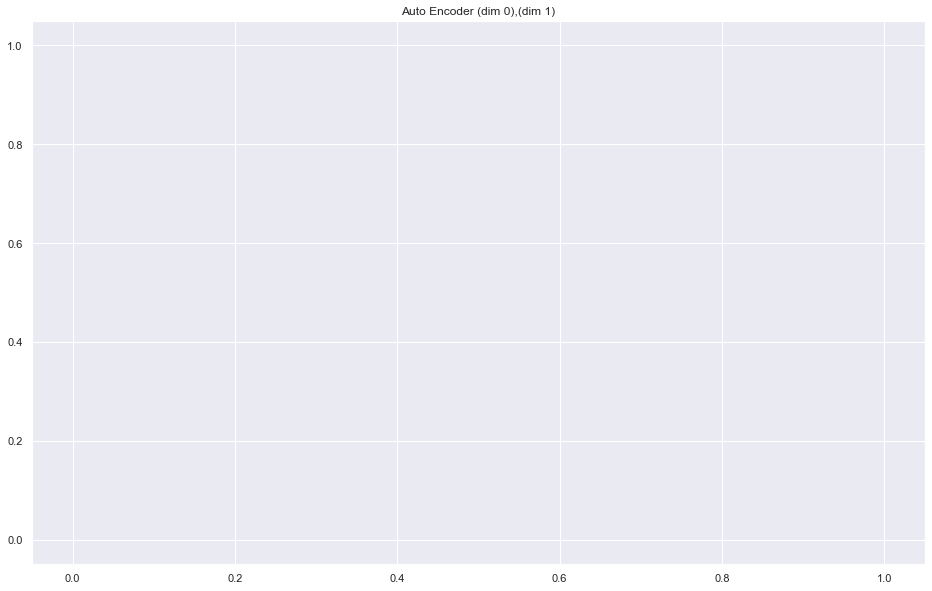

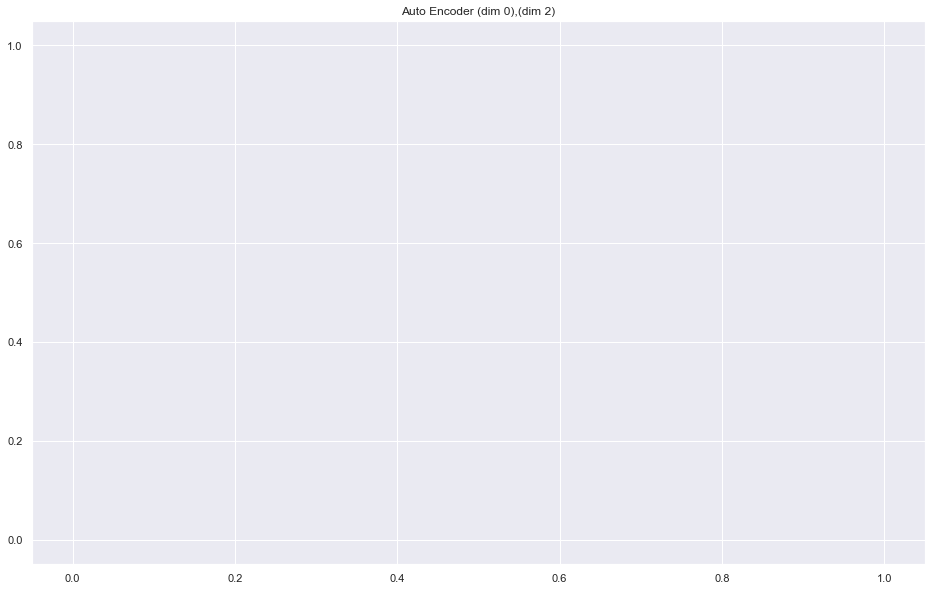

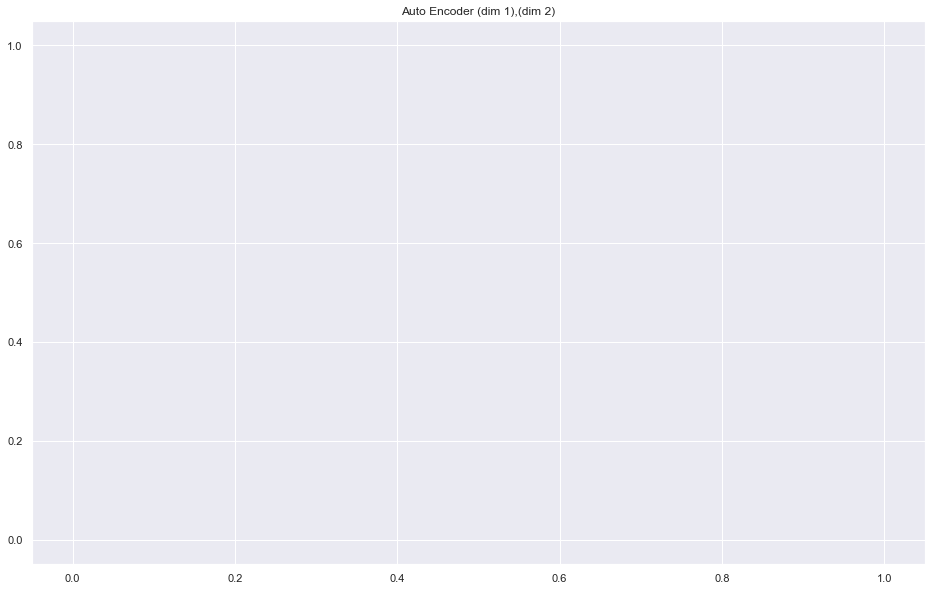

In [107]:
input_dim = Input(shape=(11,))
# DEFINE THE DIMENSION OF ENCODER ASSUMED 3
encoding_dim = 3
# DEFINE THE ENCODER LAYERS
encoded1 = Dense(9, activation='relu')(input_dim)
encoded2 = Dense(6, activation='relu')(encoded1)
encoded3 = Dense(4, activation='relu')(encoded2)
encoded4 = Dense(encoding_dim, activation='relu')(encoded3)
# DEFINE THE DECODER LAYERS
decoded1 = Dense(4, activation='relu')(encoded4)
decoded2 = Dense(6, activation='relu')(decoded1)
decoded3 = Dense(9, activation='relu')(decoded2)
decoded4 = Dense(11, activation='sigmoid')(decoded3)
# COMBINE ENCODER AND DECODER INTO AN AUTOENCODER MODEL
autoencoder = Model(input_dim, decoded4)
# CONFIGURE AND TRAIN THE AUTOENCODER
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=100, batch_size=200, shuffle=True, validation_data=(X_test, X_test))
# THE ENCODER TO EXTRACT THE REDUCED DIMENSION FROM THE ABOVE AUTOENCODER
encoder = Model(input_dim, encoded4)
encoded_input = Input(shape=(encoding_dim,))
encoded_out = encoder.predict(X_test)

AE_data = pd.DataFrame(encoded_out)
AE_data['quality'] = Y_test.values

sns.set(rc={'figure.figsize': (10, 8)})
corr = AE_data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu",
            annot=True,
            fmt=".2f")
plt.show()

printPrejections(AE_data, 'Auto Encoder')


## LLE

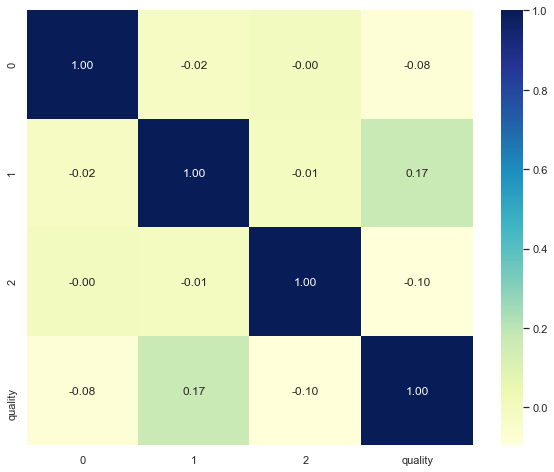

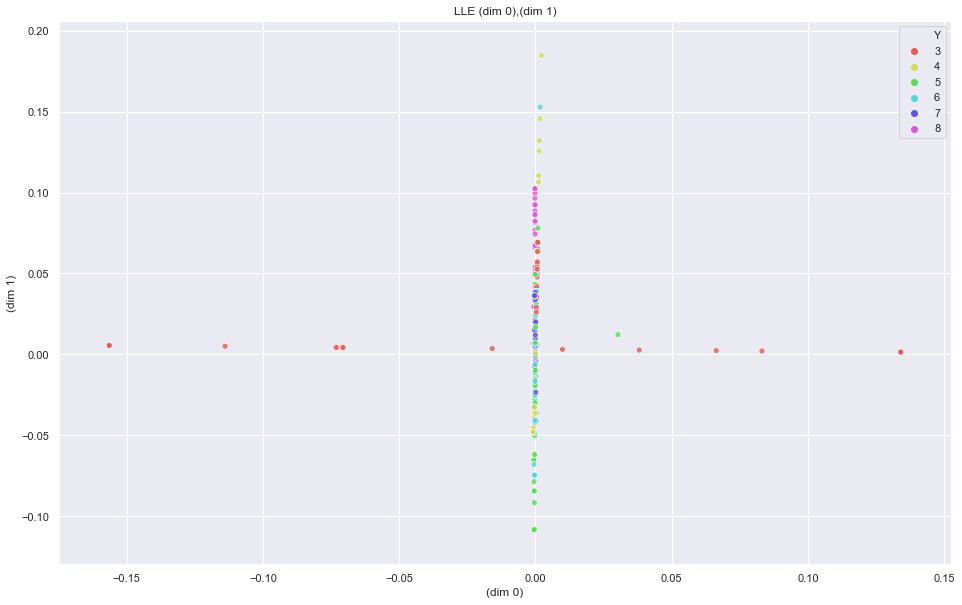

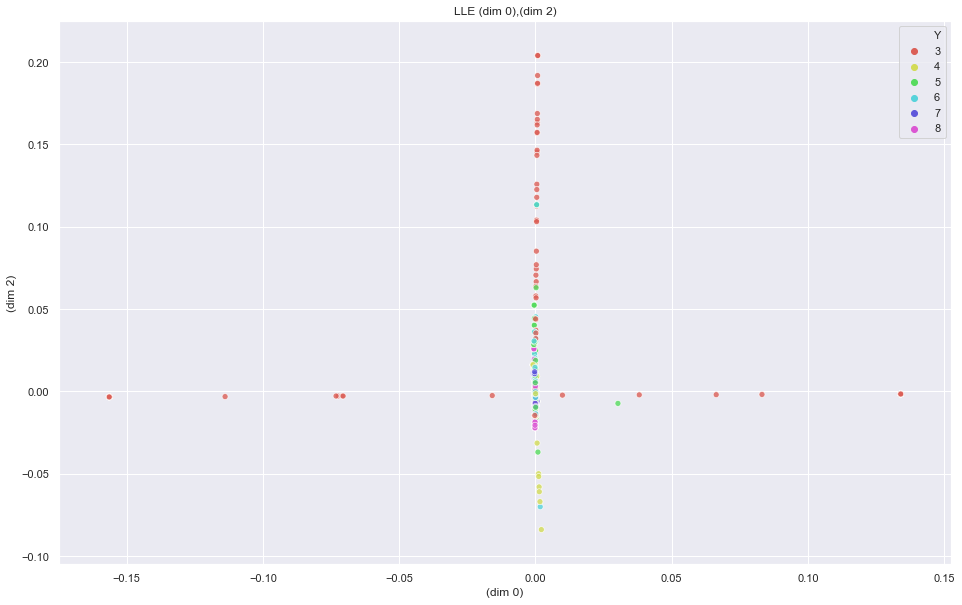

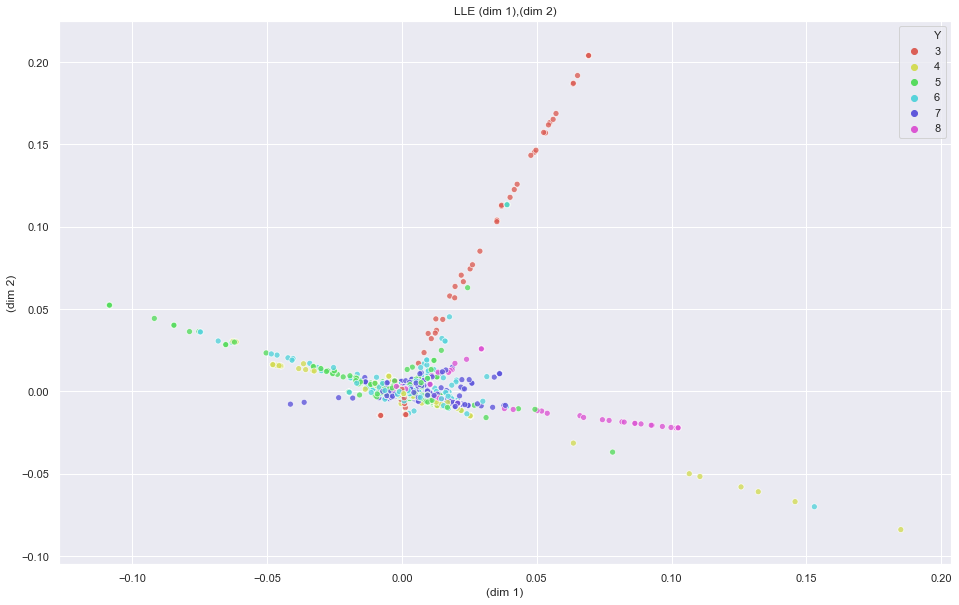

In [108]:
from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components=3)
X_transformed = embedding.fit_transform((X - X.mean()) / X.std())
X_transformed.shape

LLE_data = pd.DataFrame(X_transformed)
LLE_data['quality'] = Y.values
import seaborn as sns

sns.set(rc={'figure.figsize': (10, 8)})
corr = LLE_data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu",
            annot=True,
            fmt=".2f")
plt.show()

printPrejections(LLE_data, 'LLE')


# Linear Models Compereson

In [109]:
import math

def dotproduct(v1, v2):
  return sum((a*b) for a, b in zip(v1, v2))

def length(v):
  return math.sqrt(dotproduct(v, v))

def angle(v1, v2):
  return math.acos(dotproduct(v1, v2) / (length(v1) * length(v2)))


def continues_jacard(vec1: np.ndarray, vec2: np.ndarray):
    numerator = 0
    denominator = 0
    if len(vec1) == len(vec2):
        for i in range(0, len(vec1)):
            numerator += min(vec1[i], vec2[i])
            denominator += max(vec1[i], vec2[i])
        return numerator / denominator
    return -1


def vectorComperesion(vec1, vec1_name: str, vec2, vec2_name: str):
    print(f'radial angle between {vec1_name} and {vec2_name} = {angle(vec1, vec2)}')
    print(f'***cosine test between {vec1_name} and {vec2_name} = {math.cos(angle(vec1, vec2))}***')
    print(f'euclidean distance between {vec1_name} and {vec2_name} = {np.linalg.norm(vec1-vec2)}')
    jac = continues_jacard(vec1, vec2)
    if jac != -1:
        print(f'jaccard score between {vec1_name} and {vec2_name} = {jac}')
    else:
        print(f'jaccard Error for {vec1_name} and {vec2_name}')


def threeVectorComperesion(vec1, vec1_name: str, vec2, vec2_name: str, vec3, vec3_name: str):
    print(f'{vec1_name} is {vec1}')
    print(f'{vec2_name} is {vec2}')
    print(f'{vec3_name} is {vec3}\n\n')

    print(f'magnitude of {vec1_name} is {np.linalg.norm(vec1)}')
    print(f'magnitude of {vec2_name} is {np.linalg.norm(vec2)}')
    print(f'magnitude of {vec3_name} is {np.linalg.norm(vec3)}\n\n')
    vec_list = [(vec1, vec1_name), (vec2, vec2_name), (vec3, vec3_name)]
    for i in range(0, 2):
        for j in range(i+1, 3):
            vectorComperesion(vec_list[i][0], vec_list[i][1], vec_list[j][0], vec_list[j][1])



In [110]:
red_file = 'clean_red.csv'
white_file = 'clean_white.csv'
red_data = pd.read_csv(red_file)
white_data = pd.read_csv(white_file)
all_data = pd.concat([red_data, white_data])

In [111]:
all_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [112]:
all_mean = all_data.drop(['quality'], axis=1).mean()
all_std = all_data.drop(['quality'], axis=1).std()
normalized_all_X = (all_data.drop(['quality'], axis=1) - all_mean) / all_std


normalized_red_X = (red_data.drop(['quality'], axis=1) - all_mean) / all_std
normalized_white_X = (white_data.drop(['quality'], axis=1) - all_mean) / all_std




red_X_train, red_X_test, red_y_train, red_y_test = \
    train_test_split(normalized_red_X, red_data['quality'], test_size=0.20, random_state=42)
white_X_train, white_X_test, white_y_train, white_y_test = \
    train_test_split(normalized_white_X, white_data['quality'], test_size=0.20, random_state=42)
all_X_train, all_X_test, all_y_train, all_y_test = \
    train_test_split(normalized_all_X, all_data['quality'], test_size=0.20, random_state=42)

In [113]:
# Linear Regrestion

red_lin_reg = LinearRegression().fit(red_X_train, red_y_train)
white_lin_reg = LinearRegression().fit(white_X_train, white_y_train)
all_lin_reg = LinearRegression().fit(all_X_train, all_y_train)

red_lin_reg_vec = np.array(red_lin_reg.coef_)
white_lin_reg_vec = np.array(white_lin_reg.coef_)
all_lin_reg_vec = np.array(all_lin_reg.coef_)

threeVectorComperesion(red_lin_reg_vec, 'red_lin_reg_vec', white_lin_reg_vec, 'white_lin_reg_vec',
                       all_lin_reg_vec, 'all_lin_reg_vec')


red_lin_reg_vec is [ 0.0347275  -0.15950826 -0.03279129 -0.06876337 -0.08394959  0.05825289
 -0.15279158 -0.09279339 -0.09874426  0.17957529  0.30861513]
white_lin_reg_vec is [ 0.17581354 -0.29497157 -0.0199349   0.46693191 -0.04500097  0.0990205
 -0.00817295 -0.6191895   0.14616413  0.10650135  0.12408832]
all_lin_reg_vec is [ 0.12062183 -0.19252791 -0.01279648  0.24175112 -0.00408151  0.13918144
 -0.14778723 -0.22739027  0.08238701  0.12822288  0.30301622]


magnitude of red_lin_reg_vec is 0.46053271055178874
magnitude of white_lin_reg_vec is 0.8830279859410313
magnitude of all_lin_reg_vec is 0.5640984538560423


radial angle between red_lin_reg_vec and white_lin_reg_vec = 1.2377675699438622
***cosine test between red_lin_reg_vec and white_lin_reg_vec = 0.3269068699615618***
euclidean distance between red_lin_reg_vec and white_lin_reg_vec = 0.8520250975059747
jaccard score between red_lin_reg_vec and white_lin_reg_vec = -0.9780349190885087
radial angle between red_lin_reg_vec and all

In [114]:
#linear SVM


red_lin_SVM = svm.SVR(kernel='linear').fit(red_X_train, red_y_train)
white_lin_SVM = svm.SVR(kernel='linear').fit(white_X_train, white_y_train)
all_lin_SVM = svm.SVR(kernel='linear').fit(all_X_train, all_y_train)

red_lin_SVM_vec = np.array(red_lin_SVM.coef_[0])
white_lin_SVM_vec = np.array(white_lin_SVM.coef_[0])
all_lin_SVM_vec = np.array(all_lin_SVM.coef_[0])

threeVectorComperesion(red_lin_SVM_vec, 'red_lin_SVM_vec', white_lin_SVM_vec, 'white_lin_SVM_vec',
                       all_lin_SVM_vec, 'all_lin_SVM_vec')


red_lin_SVM_vec is [ 0.07233263 -0.12238735 -0.01669633  0.13229057 -0.04377325  0.04953777
 -0.14628704 -0.17391642 -0.05229372  0.19361631  0.32661502]
white_lin_SVM_vec is [ 0.15409876 -0.30242723 -0.02554576  0.40953487 -0.09979511  0.09953115
 -0.04130591 -0.50980742  0.16356793  0.12959816  0.16213417]
all_lin_SVM_vec is [ 0.11699622 -0.1835507  -0.01665482  0.23394141 -0.04111008  0.13426222
 -0.1592712  -0.19816067  0.09385233  0.15319191  0.3208739 ]


magnitude of red_lin_SVM_vec is 0.49082219263901766
magnitude of white_lin_SVM_vec is 0.7968017279381268
magnitude of all_lin_SVM_vec is 0.5674260930748338


radial angle between red_lin_SVM_vec and white_lin_SVM_vec = 0.7864018311110699
***cosine test between red_lin_SVM_vec and white_lin_SVM_vec = 0.7063967249077584***
euclidean distance between red_lin_SVM_vec and white_lin_SVM_vec = 0.5685709229391555
jaccard score between red_lin_SVM_vec and white_lin_SVM_vec = -0.6220597045996779
radial angle between red_lin_SVM_vec and al

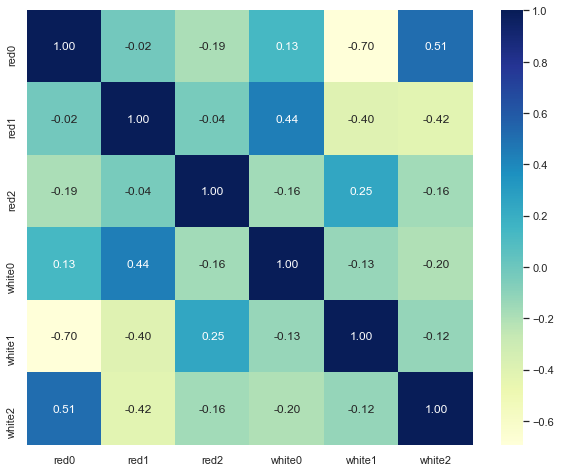

In [115]:
#PCA
red_pca = IncrementalPCA(n_components=3)
white_pca = IncrementalPCA(n_components=3)
all_pca = IncrementalPCA(n_components=3)

red_pca.fit(normalized_red_X)
white_pca.fit(normalized_white_X)
all_pca.fit(normalized_all_X)

sns.set(rc={'figure.figsize': (10, 8)})
corr = pd.DataFrame(np.corrcoef(red_pca.components_,white_pca.components_),columns=['red0','red1','red2','white0','white1','white2'])
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu",
            annot=True,
            fmt=".2f")
plt.show()
red_pca_vec_arr = [np.array(red_pca.components_[0]), np.array(red_pca.components_[1]), np.array(red_pca.components_[2])]
white_pca_vec_arr = [np.array(white_pca.components_[0]), np.array(white_pca.components_[1]), np.array(white_pca.components_[2])]
all_pca_vec_arr = [np.array(all_pca.components_[0]), np.array(all_pca.components_[1]), np.array(all_pca.components_[2])]



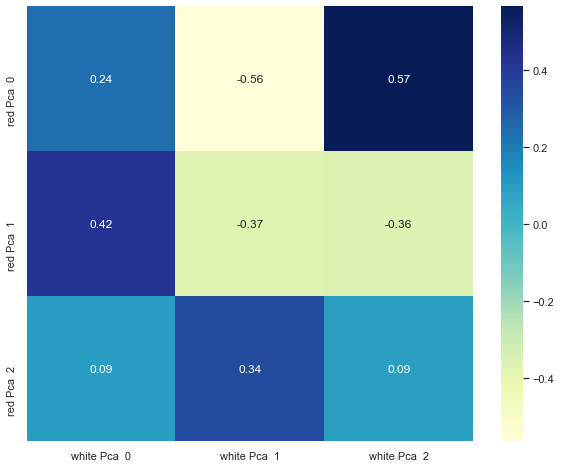

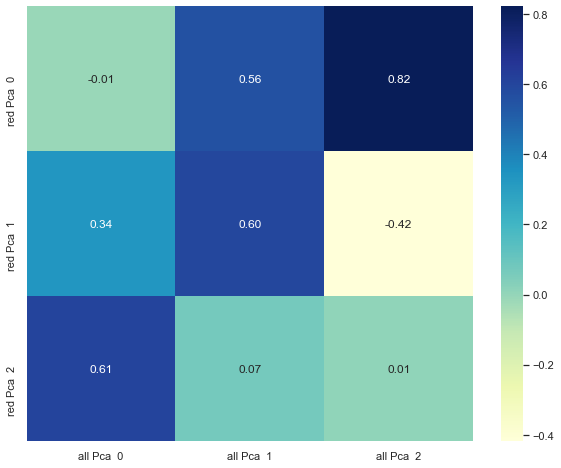

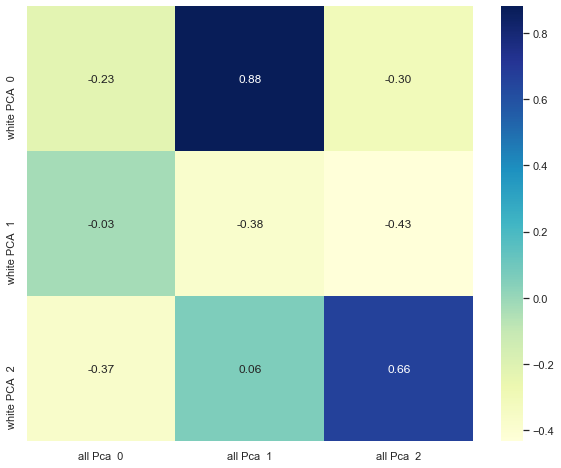

In [116]:

def compareTwoPCAs(PCA_vecs1, PCA_vecs1_name: str, PCA_vecs2, PCA_vecs2_name:str):
    table = []
    for i in range(0,len(PCA_vecs1)):
        table.append([])
        for j in range(0,len(PCA_vecs2)):
            table[i].append(math.cos(angle(PCA_vecs1[i], PCA_vecs2[j])))
    sns.set(rc={'figure.figsize': (10, 8)})
    df = pd.DataFrame(table, columns=[PCA_vecs2_name+' 0', PCA_vecs2_name+' 1', PCA_vecs2_name+' 2'],
                        index=[PCA_vecs1_name+' 0', PCA_vecs1_name+' 1', PCA_vecs1_name+' 2'])
    sns.heatmap(df,
            cmap="YlGnBu",
            annot=True,
            fmt=".2f")
    plt.show()


compareTwoPCAs(red_pca_vec_arr, 'red Pca ', white_pca_vec_arr, 'white Pca ')
plt.show()
compareTwoPCAs(red_pca_vec_arr, 'red Pca ', all_pca_vec_arr, 'all Pca ')
plt.show()
compareTwoPCAs(white_pca_vec_arr, 'white PCA ', all_pca_vec_arr, 'all Pca ')
plt.show()


# Question number 3

## 3A- Exploring the learning ease of each attribute:

In [117]:
class Combination:
    def __init__(self, att_comb, mse):
        self.att_comb = att_comb
        self.mse = mse

    def get_att_comb(self):
        return self.att_comb

    def get_mse(self):
        return self.mse

    def get_number_of_atributes(self):
        return len(self.att_comb)


def calc_lin_reg_mse(X, combination, attribute_df) -> float:
    X_train, X_test, attribute_train, attribute_test = train_test_split(X[[col for col in combination]],
                                                                        attribute_df, test_size=0.18, random_state=42)
    reg = LinearRegression().fit(X_train, attribute_train)
    attribute_pred = reg.predict(X_test)

    return mean_squared_error(attribute_test, attribute_pred)


def open_tuple_with_dict(dictionary, tup):
    vals_list = [dictionary[i] for i in tup]
    return tuple(vals_list)


for quality:
    for 1 attributes combination: 
    the min mse is: 1.3833399519334195, with the combination: 
    ('volatile_acidity',)
    for 2 attributes combination: 
    the min mse is: 0.887450358720299, with the combination: 
    ('volatile_acidity', 'alcohol')
    for 3 attributes combination: 
    the min mse is: 0.836229019917752, with the combination: 
    ('volatile_acidity', 'pH', 'alcohol')
    for 4 attributes combination: 
    the min mse is: 0.7600723628594461, with the combination: 
    ('fixed_acidity', 'volatile_acidity', 'pH', 'alcohol')
    for 5 attributes combination: 
    the min mse is: 0.7046455769197355, with the combination: 
    ('fixed_acidity', 'volatile_acidity', 'pH', 'sulphates', 'alcohol')
    for 6 attributes combination: 
    the min mse is: 0.6993168798224744, with the combination: 
    ('fixed_acidity', 'volatile_acidity', 'chlorides', 'pH', 'sulphates', 'alcohol')
    for 7 attributes combination: 
    the min mse is: 0.695261476643729, with th

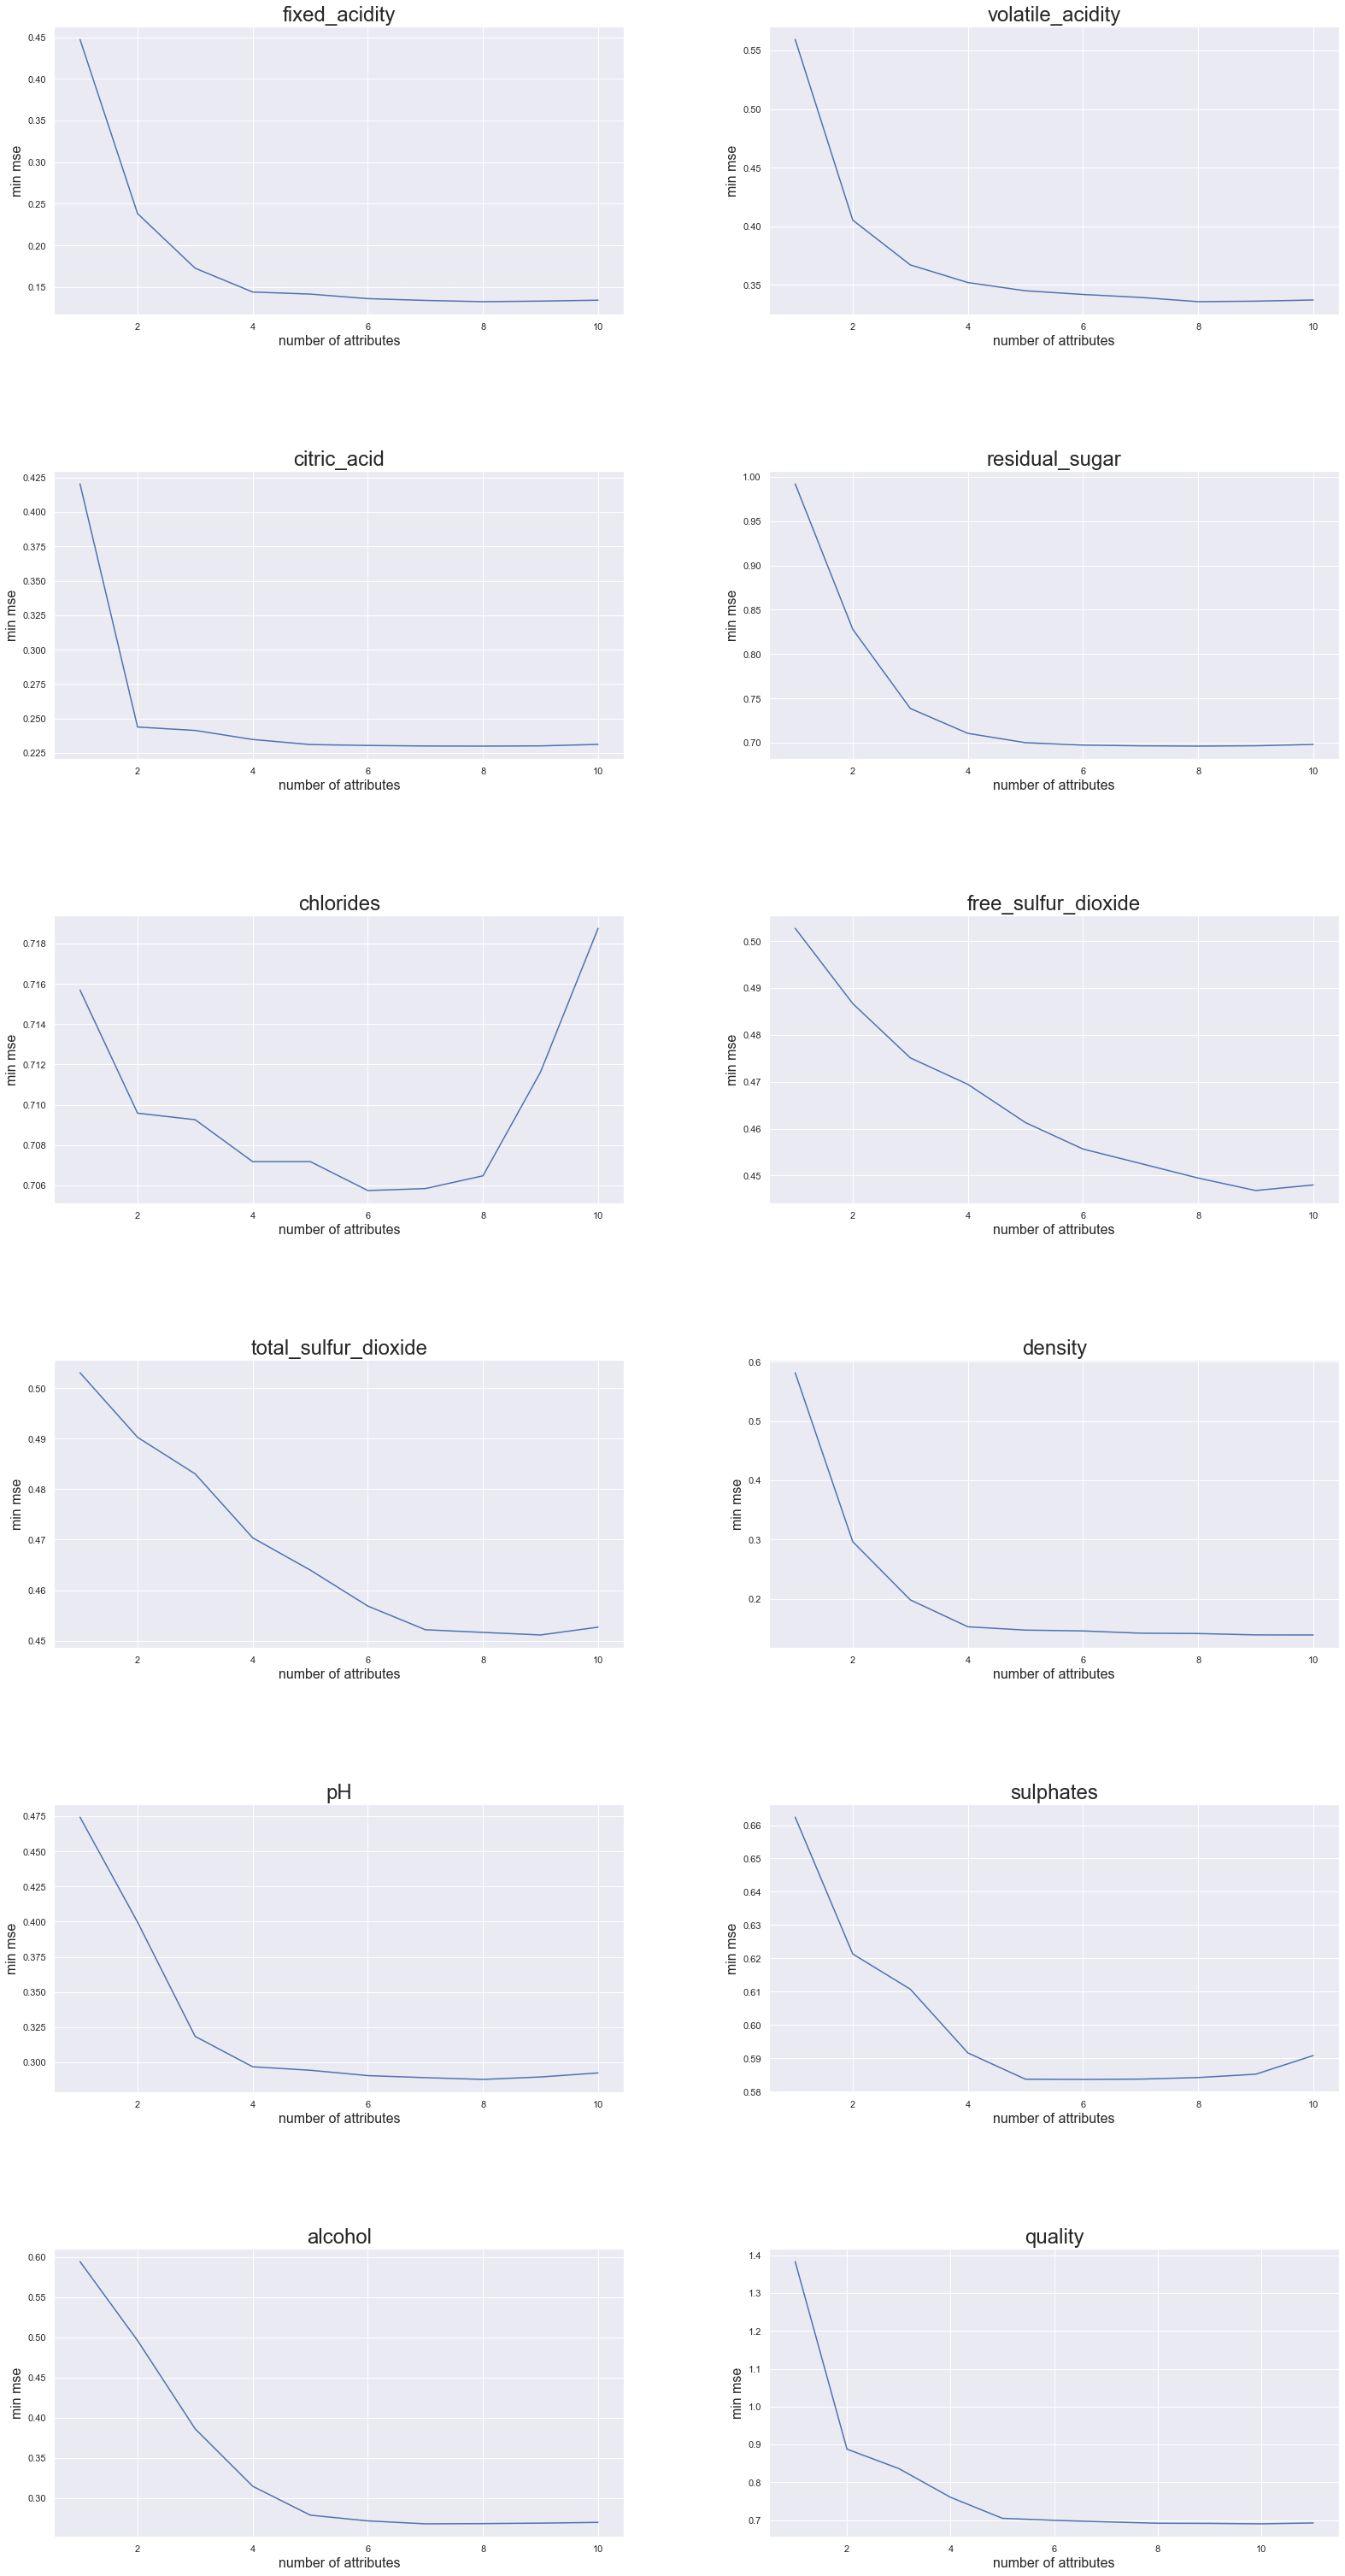

In [118]:


# # Linear regresion MSE of attribute,
# # depending on the number of attributes used in the learning process

attribute_combinations_list = []
for attribute in X.columns.tolist():
    attribute_df = X[attribute]
    current_X = X.drop([attribute], axis=1)
    attributes = X.columns.tolist()
    attributes.remove(attribute)
    attributes_dict = {}
    for i in range(10):
        attributes_dict[i] = attributes[i]
    current_X.columns = range(10)
    combinations_list = []
    for i in range(10):
        min_mse = float('inf')
        min_combination = ()
        for combination in combinations(range(10), i + 1):
            lin_reg_calc = calc_lin_reg_mse(current_X, combination, attribute_df)
            if lin_reg_calc < min_mse:
                min_mse = lin_reg_calc
                min_combination = combination
        min_combination = open_tuple_with_dict(attributes_dict, min_combination)
        combinations_list.append(Combination(min_combination, min_mse))
    attribute_combinations_list.append((attribute, combinations_list))

attribute = 'quality'
attribute_df = Y.copy()
current_X = X.copy()
attributes = X.columns.tolist()
attributes_dict = {}
for i in range(11):
    attributes_dict[i] = attributes[i]
current_X.columns = range(11)
combinations_list = []
for i in range(11):
    min_mse = float('inf')
    min_combination = ()
    for combination in combinations(range(11), i + 1):
        lin_reg_calc = calc_lin_reg_mse(current_X, combination, attribute_df)
        if lin_reg_calc < min_mse:
            min_mse = lin_reg_calc
            min_combination = combination
    min_combination = open_tuple_with_dict(attributes_dict, min_combination)
    combinations_list.append(Combination(min_combination, min_mse))
attribute_combinations_list.append((attribute, combinations_list))

fig, axs = plt.subplots(6, 2, figsize=(10, 15))
for attribute in range(len(X.columns.tolist())):
    xs = [i + 1 for i in range(10)]
    ys = [comb.get_mse() for comb in attribute_combinations_list[attribute][1]]
    axs[int(attribute / 2), int(attribute % 2)].set_xlabel('number of attributes', fontsize=16)
    axs[int(attribute / 2), int(attribute % 2)].set_ylabel('min mse', fontsize=16)
    #     axs[int(attribute / 2), int(attribute % 2)].axhline(0, lw=0.5, color='black')
    #     axs[int(attribute / 2), int(attribute % 2)].axvline(0, lw=0.5, color='black')
    axs[int(attribute / 2), int(attribute % 2)].set_title(attribute_combinations_list[attribute][0], fontsize=24)
    axs[int(attribute / 2), int(attribute % 2)].plot(xs, ys)
# quality:
attribute = 11
xs = [i + 1 for i in range(11)]
ys = [comb.get_mse() for comb in attribute_combinations_list[attribute][1]]
axs[int(attribute / 2), int(attribute % 2)].set_xlabel('number of attributes', fontsize=16)
axs[int(attribute / 2), int(attribute % 2)].set_ylabel('min mse', fontsize=16)
#     axs[int(attribute / 2), int(attribute % 2)].axhline(0, lw=0.5, color='black')
#     axs[int(attribute / 2), int(attribute % 2)].axvline(0, lw=0.5, color='black')
axs[int(attribute / 2), int(attribute % 2)].set_title(attribute_combinations_list[attribute][0], fontsize=24)
axs[int(attribute / 2), int(attribute % 2)].plot(xs, ys)
##
fig.tight_layout(pad=10.0)

i = 11
print('for ' + data.columns.tolist()[i] + ':')
for comb in attribute_combinations_list[i][1]:
    print('    for ' + str(comb.get_number_of_atributes()) + ' attributes combination: ')
    print('    the min mse is: ' + str(comb.get_mse()) + ', with the combination: ')
    print('    ' + str(comb.get_att_comb()))



For fixed_acidity,
we got the optimal result when learning with 4 attributes,
and those attributes are: ('citric_acid', 'density', 'pH', 'alcohol')

For volatile_acidity,
we got the optimal result when learning with 3 attributes,
and those attributes are: ('citric_acid', 'density', 'sulphates')

For citric_acid,
we got the optimal result when learning with 2 attributes,
and those attributes are: ('fixed_acidity', 'volatile_acidity')

For residual_sugar,
we got the optimal result when learning with 4 attributes,
and those attributes are: ('fixed_acidity', 'density', 'sulphates', 'alcohol')

For chlorides,
we got the optimal result when learning with 6 attributes,
and those attributes are: ('volatile_acidity', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'alcohol')

For free_sulfur_dioxide,
we got the optimal result when learning with 9 attributes,
and those attributes are: ('fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides', 'total_sulfur_diox

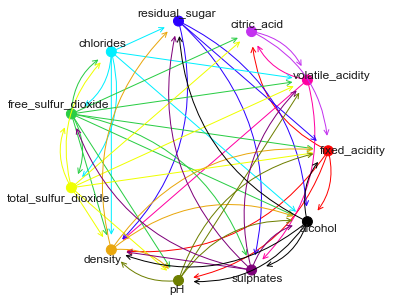

In [119]:

# # 3B- Optimal result for the attributes learning
# Relies on the graphs above, using the elbow method.

def learn_attribute(attribute_placement, num_of_attributes, attribute_combinations_list):
    print('For ' + attribute_combinations_list[attribute_placement][0] + ',')
    print('we got the optimal result when learning with ' + str(num_of_attributes) + ' attributes,')
    print('and those attributes are: ' +
          str(attribute_combinations_list[attribute_placement][1][num_of_attributes - 1].get_att_comb()))


def print_optimal_learning_results(num_of_att_list, attribute_combinations_list):
    for i in range(11):
        learn_attribute(i, num_of_att_list[i], attribute_combinations_list)
        print()


num_of_att_list = [4, 3, 2, 4, 6, 9, 7, 4, 4, 5, 5]

print_optimal_learning_results(num_of_att_list, attribute_combinations_list)

n=11

colors = {}
colors_list = ['#FF0000', '#FF00A2', '#C332EF', '#2B00FF', '#00EFFF', '#29CD44', '#EFFF00', '#E9A70D',
              '#6E7F00', '#7F007A', '#000000']

attribute_to_index = {}

for i in range(len(X.columns.tolist())):
    colors[i] = colors_list[i]
    attribute_to_index[X.columns.tolist()[i]] = i


G = nx.MultiDiGraph()
columns = X.columns.tolist()
G.add_nodes_from(columns)

    
node_list = G.nodes()
angle = []
angle_dict = {}
for i, node in zip(range(n),node_list):
    theta = 2.0*np.pi*i/n
    angle.append((np.cos(theta),np.sin(theta)))
    angle_dict[node] = theta
    
    
for attribute_placement in range(len(columns)):
    for j in range(num_of_att_list[attribute_placement]):
        G.add_edges_from([(attribute_combinations_list[attribute_placement][0],
                           attribute_combinations_list[attribute_placement][1][num_of_att_list[attribute_placement] - 1].get_att_comb()[j])])

existence_matrix = [[0 for j in range(11)] for i in range(11)]
for e in G.edges:
    num_of_same_edges = max(existence_matrix[attribute_to_index[e[0]]][attribute_to_index[e[1]]],
                            existence_matrix[attribute_to_index[e[1]]][attribute_to_index[e[0]]])
    existence_matrix[attribute_to_index[e[0]]][attribute_to_index[e[1]]] = num_of_same_edges + 1
    existence_matrix[attribute_to_index[e[1]]][attribute_to_index[e[0]]] = num_of_same_edges + 1

def edge_num(att1, att2):
    edge_num = existence_matrix[attribute_to_index[att1]][attribute_to_index[att2]] - 1
    existence_matrix[attribute_to_index[att1]][attribute_to_index[att2]] -= 1
    existence_matrix[attribute_to_index[att2]][attribute_to_index[att2]] -= 1
    return edge_num


color_map = []
for node in G:
    color_map.append(colors[attribute_to_index[node]])


# figsize is intentionally set small to condense the graph
fig, ax = plt.subplots(figsize=(5,5))
margin=0.1
fig.subplots_adjust(margin, margin, 1.-margin, 1.-margin)
ax.axis('equal')
    
    
pos=nx.shell_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size = 100, alpha = 1, with_labels = True)
ax = plt.gca()

for e in G.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="<-", color=colors[attribute_to_index[e[0]]],
                                shrinkA=15, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*edge_num(e[0],e[1]))
                                ),
                                ),
               )
    
description = nx.draw_networkx_labels(G, pos)

factor_dic = {
    'fixed_acidity': (0.09,0),
    'volatile_acidity': (0.1,-0.02),
    'citric_acid': (0,-0.03),
    'residual_sugar': (0,-0.04),
    'chlorides': (0,-0.01),
    'free_sulfur_dioxide': (0,0.05),
    'total_sulfur_dioxide': (0,-0.05),
    'density': (0,0),
    'pH': (0,0.03),
    'sulphates': (0,0.025),
    'alcohol': (0,0),
}


r = fig.canvas.get_renderer()
trans = plt.gca().transData.inverted()
for node, t in description.items():
    bb = t.get_window_extent(renderer=r)
    bbdata = bb.transformed(trans)
    radius = 1 + 0.1
    x_factor = factor_dic[str(node)][0]
    y_factor = factor_dic[str(node)][1]
    position = (radius*np.cos(angle_dict[node]) + x_factor, radius* np.sin(angle_dict[node]) + y_factor)
    t.set_position(position)
    t.set_clip_on(False)

plt.axis('off')
plt.show()

# World's greatest grape

In [120]:
unnormal = pd.read_csv(oversampled_clean_data_FN).drop(['quality'], axis=1)
mean = unnormal.mean()
std = unnormal.std()

In [121]:
def CustumLossFunctionSVM_rbf(x: list):
    X_df = pd.DataFrame([x], columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
                                      'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
                                      'density', 'pH', 'sulphates', 'alcohol'])
    prediction_value = SVR_rbf.predict(X_df)
    while type(prediction_value) == np.ndarray:
        prediction_value = prediction_value[0]
    return abs(10 - prediction_value)

def CustumLossFunctionDNN(x: list):
    X_df = pd.DataFrame([x], columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
                                      'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
                                      'density', 'pH', 'sulphates', 'alcohol'])
    prediction_value = DNN_model.predict(X_df)
    while type(prediction_value) == np.ndarray:
        prediction_value = prediction_value[0]
    return abs(10 - prediction_value)


methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'L-BFGS-B', 'TNC', 'COBYLA', 'SLSQP', 'trust-constr']

In [122]:
min_error = 100
best_method = ''
x0 = list(data[data.quality == data.quality.max()].mean().to_frame().T.drop(['quality'], axis=1).values[0])
print(x0)
for m in methods:
    res = minimize(CustumLossFunctionSVM_rbf, x0, method=m, tol=1e-6, options={'maxiter': 10000})
    if res.fun < min_error:
        best_method = m
        min_error = res.fun

print(best_method)
print(min_error)
res = minimize(CustumLossFunctionSVM_rbf, x0, method=best_method, tol=1e-6, options={'maxiter': 10000})
print('best grape SVR_rbf score: ', SVR_rbf.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape DNN score: ', DNN_model.predict(pd.Series(res.x).to_frame().T)[0][0])
print('best grape SVR_lin score: ', SVR_lin.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape SVR_poly score: ', SVR_poly.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape Linear regression score: ', reg.predict(pd.Series(res.x).to_frame().T)[0])

[0.043869243791148, -0.7236646766408047, 0.5865282339182675, -0.1389506529618245, -0.6298754333080434, -0.049136018003277215, -0.2003119730744421, -0.7677614049679024, -0.5213186572058001, 0.8636006569235797, 1.063523722065274]
COBYLA
0.632660518311603
best grape SVR_rbf score:  9.367339481688397
best grape DNN score:  7.8980055
best grape SVR_lin score:  8.344622810451543
best grape SVR_poly score:  10.294994224655852
best grape Linear regression score:  8.008566717579768


In [123]:
pd.DataFrame([res.x], columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
                                      'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
                                      'density', 'pH', 'sulphates', 'alcohol'])*std+mean

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,6.596713,0.440651,0.537905,1.838799,0.065495,4.692564,6.307101,0.994625,3.141017,0.81734,11.918615


In [124]:
min_error = 100
best_method = ''
x0 = list(data[data.quality == data.quality.max()].mean().to_frame().T.drop(['quality'], axis=1).values[0])
print(x0)
for m in methods:
    res = minimize(CustumLossFunctionDNN, x0, method=m, tol=1e-6, options={'maxiter': 10000})
    if res.fun < min_error:
        best_method = m
        min_error = res.fun

print(best_method)
print(min_error)
res = minimize(CustumLossFunctionDNN, x0, method=best_method, tol=1e-6, options={'maxiter': 10000})
print('best grape SVR_rbf score: ', SVR_rbf.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape DNN score: ', DNN_model.predict(pd.Series(res.x).to_frame().T)[0][0])
print('best grape SVR_lin score: ', SVR_lin.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape SVR_poly score: ', SVR_poly.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape Linear regression score: ', reg.predict(pd.Series(res.x).to_frame().T)[0])

[0.043869243791148, -0.7236646766408047, 0.5865282339182675, -0.1389506529618245, -0.6298754333080434, -0.049136018003277215, -0.2003119730744421, -0.7677614049679024, -0.5213186572058001, 0.8636006569235797, 1.063523722065274]


C:\Users\tombe\anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
C:\Users\tombe\anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
C:\Users\tombe\anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.',

Powell
0.45835018157958984
best grape SVR_rbf score:  5.4224666938044805
best grape DNN score:  9.54165
best grape SVR_lin score:  15.864762325845723
best grape SVR_poly score:  56.55645078247976
best grape Linear regression score:  14.941679777970206


In [125]:
pd.DataFrame([res.x], columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
                                      'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
                                      'density', 'pH', 'sulphates', 'alcohol'])*std+mean

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,8.085392,-0.571963,1.169315,7.281533,0.037158,29.655991,-85.408971,0.996914,2.448422,0.604548,14.29293


In [126]:
min_error = 100
best_method = ''
x0 = list(data[data.quality == data.quality.max()].mean().to_frame().T.drop(['quality'], axis=1).values[0])
print(x0)
for m in methods:
    res = minimize(CustumLossFunctionSVM_rbf, x0, method=m, tol=1e-6, options={'maxiter': 10000})
    if res.fun < min_error:
        best_method = m
        min_error = res.fun

print(best_method)
print(min_error)
res = minimize(CustumLossFunctionSVM_rbf, x0, method=best_method, tol=1e-6, options={'maxiter': 10000})
print('best grape SVR_rbf score: ', SVR_rbf.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape DNN score: ', DNN_model.predict(pd.Series(res.x).to_frame().T)[0][0])
print('best grape SVR_lin score: ', SVR_lin.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape SVR_poly score: ', SVR_poly.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape Linear regression score: ', reg.predict(pd.Series(res.x).to_frame().T)[0])

[0.043869243791148, -0.7236646766408047, 0.5865282339182675, -0.1389506529618245, -0.6298754333080434, -0.049136018003277215, -0.2003119730744421, -0.7677614049679024, -0.5213186572058001, 0.8636006569235797, 1.063523722065274]
COBYLA
0.632660518311603
best grape SVR_rbf score:  9.367339481688397
best grape DNN score:  7.8980055
best grape SVR_lin score:  8.344622810451543
best grape SVR_poly score:  10.294994224655852
best grape Linear regression score:  8.008566717579768


In [ ]:
# learning_methods = ['Linear_Regression', 'SVM_rbf', 'SVM_linear', 'SVM_poly']

In [ ]:
# def calc_learning_mse(X, combination, attribute_df):
#     X_train, X_test, attribute_train, attribute_test = train_test_split(X[[col for col in combination]],
#                                                                         attribute_df, test_size=0.18, random_state=42)
    
#     reg = LinearRegression().fit(X_train, attribute_train)
#     attribute_pred = reg.predict(X_test)
#     lin_reg_mse = mean_squared_error(attribute_test, attribute_pred)
    
#     reg = svm.SVR(kernel='rbf').fit(X_train, attribute_train)
#     attribute_pred = reg.predict(X_test)
#     svm_rbf_mse = mean_squared_error(attribute_test, attribute_pred)
    
#     reg = svm.SVR(kernel='linear').fit(X_train, attribute_train)
#     attribute_pred = reg.predict(X_test)
#     svm_linear_mse = mean_squared_error(attribute_test, attribute_pred)
    
#     reg = svm.SVR(kernel='poly', degree = 2).fit(X_train, attribute_train)
#     attribute_pred = reg.predict(X_test)
#     svm_poly_mse = mean_squared_error(attribute_test, attribute_pred)
    
#     mse_dict = {
#         learning_methods[0]: lin_reg_mse,
#         learning_methods[1]: svm_rbf_mse,
#         learning_methods[2]: svm_linear_mse,
#         learning_methods[3]: svm_poly_mse,
#     }
    
#     return mse_dict

In [ ]:
# attribute = 'quality'
# attribute_df = Y.copy()
# current_X = X.copy()
# attributes = X.columns.tolist()
# attributes_dict = {}
# for i in range(11):
#     attributes_dict[i] = attributes[i]
# current_X.columns = range(11)
# learning_method_combination_list = []
# for i in range(len(learning_methods)):
#     learning_method_combination_list.append([learning_methods[i],[]])
# for k in range(11):
#     min_comb_and_mse = []
#     for i in range(len(learning_methods)):
#         min_comb_and_mse.append((learning_methods[i], float('inf'), ()))
#     for combination in combinations(range(11), k + 1):
#         learning_mse = calc_learning_mse(current_X, combination, attribute_df)
#         for i in range(len(min_comb_and_mse)):
#             current_learning_mse = learning_mse[min_comb_and_mse[i][0]]
#             if current_learning_mse < min_comb_and_mse[i][1]:
#                 min_comb_and_mse[i] = (min_comb_and_mse[i][0], current_learning_mse, combination)
#     print('finished '+ str(k + 1) + ' combinations')
#     for i in range(len(min_comb_and_mse)):
#         tup = min_comb_and_mse[i]
#         min_mse = tup[1]
#         min_combination = tup[2]
#         min_combination = open_tuple_with_dict(attributes_dict, min_combination)
#         learning_method_combination_list[learning_methods.index(tup[0])][1].append(Combination(min_combination, min_mse))

In [ ]:
# %matplotlib inline
# fig, axs = plt.subplots(2, 2, figsize=(25, 15))
# # quality:
# attribute = 'quality'
# attribute_num = 11
# for i in range(len(learning_methods)):
#     xs = [j + 1 for j in range(11)]
#     ys = [comb.get_mse() for comb in learning_method_combination_list[i][1]]
#     axs[int(i / 2), int(i % 2)].set_xlabel('number of attributes', fontsize=16)
#     axs[int(i / 2), int(i % 2)].set_ylabel('min mse', fontsize=16)
#     #     axs[int(attribute / 2), int(attribute % 2)].axhline(0, lw=0.5, color='black')
#     #     axs[int(attribute / 2), int(attribute % 2)].axvline(0, lw=0.5, color='black')
#     axs[int(i / 2), int(i % 2)].set_title(attribute + ' ' +learning_method_combination_list[i][0], fontsize=24)
#     axs[int(i / 2), int(i % 2)].plot(xs, ys)
#     fig.tight_layout(pad=4.0)